<a href="https://colab.research.google.com/github/BenjaminUy/Predicting-Loan-User-Default-Risk/blob/main/notebooks/Cleaning_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **India Loan Users - Data Cleaning & Analysis**
Notebook creator: Benjamin Uy

Date created: 6/28/2025

---
Introduction: This is my Jupyter notebook for performing data cleaning and analysis on a Kaggle dataset on loan customers from India.

The dataset I will use is from Kaggle user Subham Surana's "Loan Prediction Based on Customer Behavior" (link below). The original dataset has 13 columns and +250,000 rows, where each row is a consumer user including details like age, income, geography, and whether or not they were flagged. Note that this dataset was organized by Univ.AI.

Link to dataset: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv


### **1) Data Cleaning**

In [158]:
# Import required modules
import pandas as pd
import numpy as np

In [159]:
# URL to dataset from project repo
url = 'https://raw.githubusercontent.com/BenjaminUy/Predicting-Loan-User-Default-Risk/refs/heads/main/datasets/loan_users.csv'

df = pd.read_csv(url);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [160]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [161]:
df['Risk_Flag'].value_counts(normalize=True)

,proportion
Risk_Flag,
0,0.877
1,0.123


It appears that about 12% of loan users in this dataset were flagged for potentially defaulting.

In [162]:
# I will drop Id as this likely won't be useful in future analysis
df = df.drop(columns = ['Id'])

In [163]:
# Remove rows with null values
df = df.dropna(axis=0)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [164]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [165]:
df['Profession'].value_counts().head(10)

,count
Profession,
Physician,5957
Statistician,5806
Web_designer,5397
Psychologist,5390
Computer_hardware_engineer,5372
Drafter,5359
Magistrate,5357
Fashion_Designer,5304
Air_traffic_controller,5281


In [166]:
df['CITY'].value_counts().head(10)

,count
CITY,
Vijayanagaram,1259
Bhopal,1208
Bulandshahr,1185
Saharsa[29],1180
Vijayawada,1172
Srinagar,1136
Indore,1130
New_Delhi,1098
Hajipur[31],1098


In [167]:
df['STATE'].value_counts().head(10)

,count
STATE,
Uttar_Pradesh,28400
Maharashtra,25562
Andhra_Pradesh,25297
West_Bengal,23483
Bihar,19780
Tamil_Nadu,16537
Madhya_Pradesh,14122
Karnataka,11855
Gujarat,11408


There seem to be some formatting inconsistencies such as mixed cases in Profession and extra characters in CITY (and possibly) STATE. Let's fix them.

In [168]:
import re

# Formatting STATE to proper case
df['STATE'] = df['STATE'].str.title()

# Removing instances of square brackets
pattern = r"\[(\d+)\]"
repl = ''
df['STATE'] = df['STATE'].apply(lambda x : re.sub(pattern, repl, x))

df['STATE'].value_counts()

,count
STATE,
Uttar_Pradesh,29143
Maharashtra,25562
Andhra_Pradesh,25297
West_Bengal,23483
Bihar,19780
Tamil_Nadu,16537
Madhya_Pradesh,14122
Karnataka,11855
Gujarat,11408


In [169]:
# Formatting CITY to proper case
df['CITY'] = df['CITY'].str.title()

# Removing instances of square brackets
pattern = r"\[(\d+)\]"
repl = ''
df['CITY'] = df['CITY'].apply(lambda x : re.sub(pattern, repl, x))

df['CITY'].value_counts()

,count
CITY,
Aurangabad,1543
Vijayanagaram,1259
Bhopal,1208
Bulandshahr,1185
Saharsa,1180
...,...
Ujjain,486
Warangal,459
Bettiah,457


In [170]:
# Formatting Profession to proper case
df['Profession'] = df['Profession'].str.title()

# Just in case, removing instances of square brackets
pattern = r"\[(\d+)\]"
repl = ''
df['Profession'] = df['Profession'].apply(lambda x : re.sub(pattern, repl, x))

df['Profession'].value_counts()

,count
Profession,
Physician,5957
Statistician,5806
Web_Designer,5397
Psychologist,5390
Computer_Hardware_Engineer,5372
Drafter,5359
Magistrate,5357
Fashion_Designer,5304
Air_Traffic_Controller,5281


In [171]:
df.nunique()

,0
Income,41920
Age,59
Experience,21
Married/Single,2
House_Ownership,3
Car_Ownership,2
Profession,51
CITY,316
STATE,28
CURRENT_JOB_YRS,15


Things to note:
- In terms of non-numeric columns, Profession, CITY, and STATE have the most unique values.
- We'll need to find ways to reduce this number, if I am to continue using these features for further analysis.
- Married/Single, House_Ownership, Car_Ownership, CURRENT_HOUSE_YRS, and Risk_Flag could be categorical.

Future steps:
- Since CITY may have too many values to work with as a categorical variable, I could discard this feature, since STATE may implicitly account for removing CITY.
- Find ways to group Professions by same sector (e.g., military, politics, engineering, etc.)
- Alternative approach to grouping Professions: create a variable that indicates if the user's income is an outlier, given their profession.
- Could create variable that indicates if there is a incongruity between the STATE and CITY variables (i.e., if a STATE should not be associated with a CITY).


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [173]:
'''
Let's see if we can indicate whether a person's income is a significantly
lower given their profession, state, and city. Perhaps this might suggest
a person is less financially stable than others in the same profession, and
thus more likely to default.
'''

# Here, I define an income as 'significantly lower' if it is less than the 5% quantile
threshold = 0.05

income_group = df.groupby(['Profession', 'STATE', 'CITY'])['Income'].quantile(threshold)
income_group.head()

Profession              STATE           CITY       
Air_Traffic_Controller  Andhra_Pradesh  Adoni          8835408.05
                                        Amaravati      9287884.90
                                        Anantapur       626126.20
                                        Anantapuram     505809.00
                                        Bhimavaram     1482344.00
Name: Income, dtype: float64

In [174]:
# Now, we create an indicator variable checking if a person's income, given their
# profession, state, and city is higher than or equal to this threshold
df['Above_Income_Threshold'] = df.apply(lambda x: 1 if x['Income'] >= income_group[x['Profession'], x['STATE'], x['CITY']] else 0, axis=1)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold
0,1303834,23,3,single,rented,no,Mechanical_Engineer,Rewa,Madhya_Pradesh,3,13,0,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1
2,3991815,66,4,married,rented,no,Technical_Writer,Alappuzha,Kerala,4,10,0,1
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1
4,5768871,47,11,single,rented,no,Civil_Servant,Tiruchirappalli,Tamil_Nadu,3,14,1,1


In [175]:
df['House_Ownership'].value_counts()

,count
House_Ownership,
rented,231898
owned,12918
norent_noown,7184


In [176]:
# Convert Married/Single to a binary variable to indicate the person is married (1)
df['Married/Single'] = df['Married/Single'].apply(lambda x: 1 if x == 'married' else 0)
df.rename(columns = {'Married/Single' : 'Is_Married'}, inplace=True)

# Same with car ownership
df['Car_Ownership'] = df['Car_Ownership'].apply(lambda x: 1 if x == 'yes' else 0)
df.rename(columns = {'Car_Ownership' : 'Owns_Car'}, inplace=True)

# Convert House_Ownership to an ordinal categorical variable where:
# norent_noown = 0, rented = 1, owned = 2
df['House_Ownership'] = df['House_Ownership'].apply(lambda x: 0 if x == 'norent_noown' else 1 if x == 'rented' else 2)
df.rename(columns = {'House_Ownership' : 'House_Ownership_Ordinal'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Income                   252000 non-null  int64 
 1   Age                      252000 non-null  int64 
 2   Experience               252000 non-null  int64 
 3   Is_Married               252000 non-null  int64 
 4   House_Ownership_Ordinal  252000 non-null  int64 
 5   Owns_Car                 252000 non-null  int64 
 6   Profession               252000 non-null  object
 7   CITY                     252000 non-null  object
 8   STATE                    252000 non-null  object
 9   CURRENT_JOB_YRS          252000 non-null  int64 
 10  CURRENT_HOUSE_YRS        252000 non-null  int64 
 11  Risk_Flag                252000 non-null  int64 
 12  Above_Income_Threshold   252000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 25.0+ MB


### **2) Data Exploration/Analysis**

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Income                   252000 non-null  int64 
 1   Age                      252000 non-null  int64 
 2   Experience               252000 non-null  int64 
 3   Is_Married               252000 non-null  int64 
 4   House_Ownership_Ordinal  252000 non-null  int64 
 5   Owns_Car                 252000 non-null  int64 
 6   Profession               252000 non-null  object
 7   CITY                     252000 non-null  object
 8   STATE                    252000 non-null  object
 9   CURRENT_JOB_YRS          252000 non-null  int64 
 10  CURRENT_HOUSE_YRS        252000 non-null  int64 
 11  Risk_Flag                252000 non-null  int64 
 12  Above_Income_Threshold   252000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 25.0+ MB


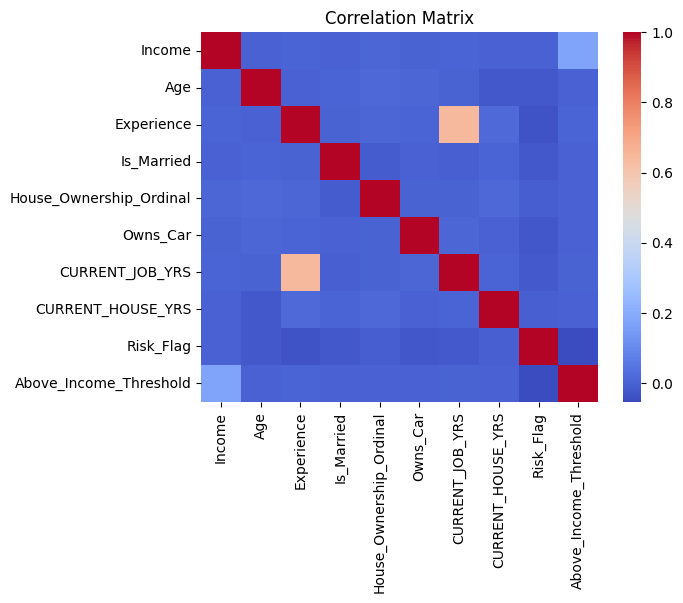

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Notes from above:
- Moderate correlation between Experience and CURRENT_JOB_YRS (makes sense)
- Slight correlation between Above_Income_Threshold and Income (also makes sense)

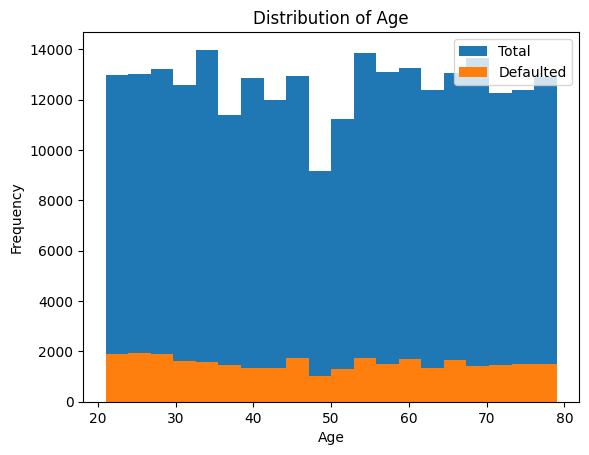

In [179]:
# Let's look into the distribution of loan users' age
plt.hist(df['Age'], bins=20)

# Stack to show those who defaulted
plt.hist(df[df['Risk_Flag'] == 1]['Age'], bins=20)

plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [180]:
# Now for state
state_counts = df['STATE'].value_counts()
state_counts.head()

,count
STATE,
Uttar_Pradesh,29143
Maharashtra,25562
Andhra_Pradesh,25297
West_Bengal,23483
Bihar,19780


In [181]:
risk_state_counts = df[df['Risk_Flag'] == 1]['STATE'].value_counts()
risk_state_counts.head()

,count
STATE,
Uttar_Pradesh,3440
West_Bengal,3009
Andhra_Pradesh,2935
Maharashtra,2895
Bihar,2583


In [182]:
# Merge risk_state_counts with state_counts by key of STATE
state_counts = state_counts.to_frame(name='Total')
risk_state_counts = risk_state_counts.to_frame(name='Defaulted')

state_counts = state_counts.merge(risk_state_counts, on='STATE', how='left')
state_counts.fillna(0, inplace=True)
state_counts.head()

,Total,Defaulted
STATE,,
Uttar_Pradesh,29143,3440
Maharashtra,25562,2895
Andhra_Pradesh,25297,2935
West_Bengal,23483,3009
Bihar,19780,2583


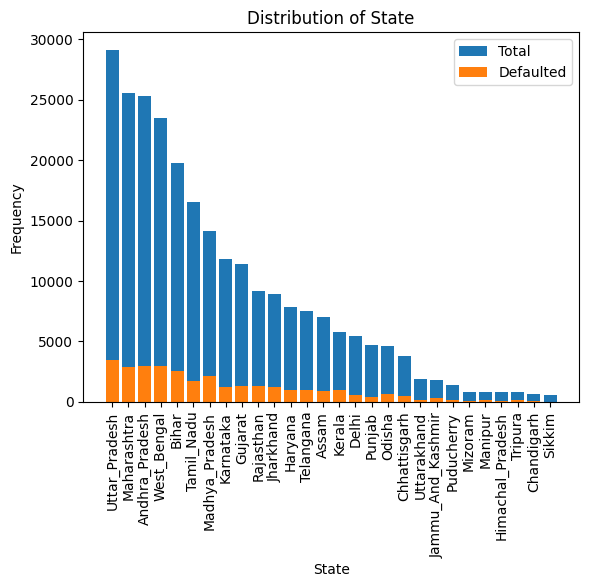

In [183]:
plt.bar(state_counts.index, state_counts['Total'])
plt.bar(state_counts.index, state_counts['Defaulted'])
plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of State')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

There does not appear to be any clear pattern with Age and State and default risk.

In [184]:
# What about CURRENT_JOB_YRS (and CURRENT_HOUSE_YRS)

job_yrs_counts = df['CURRENT_JOB_YRS'].value_counts()
risk_job_yrs_counts = df[df['Risk_Flag'] == 1]['CURRENT_JOB_YRS'].value_counts()

job_yrs_counts = job_yrs_counts.to_frame(name='Total')
risk_job_yrs_counts = risk_job_yrs_counts.to_frame(name='Defaulted')

job_yrs_counts = job_yrs_counts.merge(risk_job_yrs_counts, on='CURRENT_JOB_YRS', how='left')
job_yrs_counts.fillna(0, inplace=True)

job_yrs_counts.sort_index(inplace=True)
job_yrs_counts.head()

,Total,Defaulted
CURRENT_JOB_YRS,,
0,11043,1582
1,11575,1802
2,11087,1890
3,29460,3411
4,28339,3207


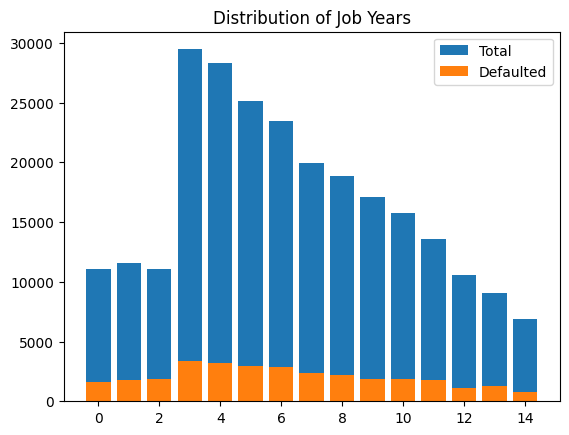

In [185]:
plt.bar(job_yrs_counts.index, job_yrs_counts['Total'])
plt.bar(job_yrs_counts.index, job_yrs_counts['Defaulted'])
plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of Job Years')
plt.show()

In [186]:
# CURRENT_HOUSE_YRS
home_yrs_counts = df['CURRENT_HOUSE_YRS'].value_counts()
risk_home_yrs_counts = df[df['Risk_Flag'] == 1]['CURRENT_HOUSE_YRS'].value_counts()

home_yrs_counts = home_yrs_counts.to_frame(name='Total')
risk_home_yrs_counts = risk_home_yrs_counts.to_frame(name='Defaulted')

home_yrs_counts = home_yrs_counts.merge(risk_home_yrs_counts, on='CURRENT_HOUSE_YRS', how='left')
home_yrs_counts.fillna(0, inplace=True)

home_yrs_counts.sort_index(inplace=True)
home_yrs_counts.head()

,Total,Defaulted
CURRENT_HOUSE_YRS,,
10,48674,6082
11,51873,6483
12,51791,6304
13,50659,6182
14,49003,5945


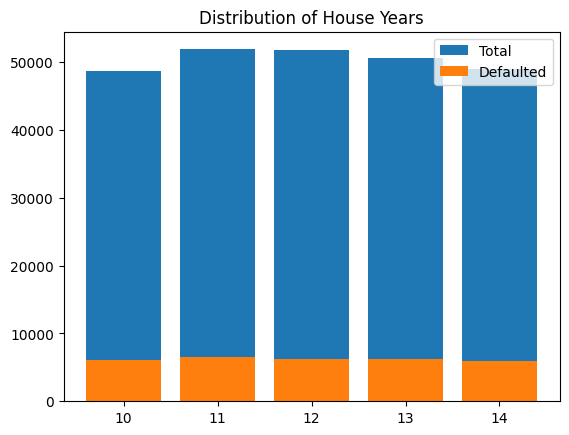

In [187]:
plt.bar(home_yrs_counts.index, home_yrs_counts['Total'])
plt.bar(home_yrs_counts.index, home_yrs_counts['Defaulted'])
plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of House Years')
plt.show()

Distribution of House Years, including those who defaulted, seems pretty consistent, unlike current job years, where there are fewer loan users with only 0-2 years in their current job.

In [188]:
# Let's check distribution of profession
prof_counts = df['Profession'].value_counts()
risk_prof_counts = df[df['Risk_Flag'] == 1]['Profession'].value_counts()

prof_counts = prof_counts.to_frame(name='Total')
risk_prof_counts = risk_prof_counts.to_frame(name='Defaulted')

prof_counts = prof_counts.merge(risk_prof_counts, on='Profession', how='left')
prof_counts.fillna(0, inplace=True)

prof_counts.sort_index(inplace=True)
prof_counts.head()

,Total,Defaulted
Profession,,
Air_Traffic_Controller,5281,715
Analyst,4668,567
Architect,4657,611
Army_Officer,4661,709
Artist,4861,596


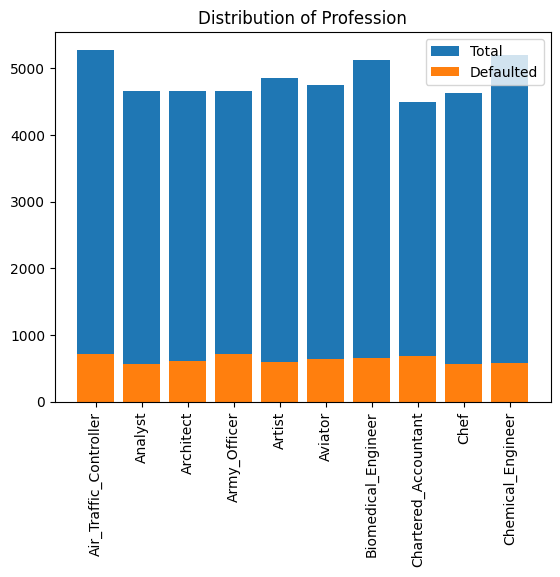

In [189]:
plt.bar(prof_counts.head(10).index, prof_counts.head(10)['Total'])
plt.bar(prof_counts.head(10).index, prof_counts.head(10)['Defaulted'])
plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of Profession')
plt.xticks(rotation=90)
plt.show()

In [190]:
# Group by House_Ownership_Ordinal
house_counts = df['House_Ownership_Ordinal'].value_counts()
risk_house_counts = df[df['Risk_Flag'] == 1]['House_Ownership_Ordinal'].value_counts()

house_counts = house_counts.to_frame(name='Total')
risk_house_counts = risk_house_counts.to_frame(name='Defaulted')

house_counts = house_counts.merge(risk_house_counts, on='House_Ownership_Ordinal', how='left')
house_counts.fillna(0, inplace=True)

house_counts.sort_index(inplace=True)
house_counts.head()

,Total,Defaulted
House_Ownership_Ordinal,,
0,7184,715
1,231898,29121
2,12918,1160


In [191]:
# For interpretability, I'll create a new column in house_counts that is the
# ratio of Defaulted to Total
house_counts['Defaulted_Ratio'] = house_counts['Defaulted'] / house_counts['Total']
house_counts.head()

,Total,Defaulted,Defaulted_Ratio
House_Ownership_Ordinal,,,
0,7184,715,0.099527
1,231898,29121,0.125577
2,12918,1160,0.089797


Text(0, 0.5, 'Percentage of Defaulted')

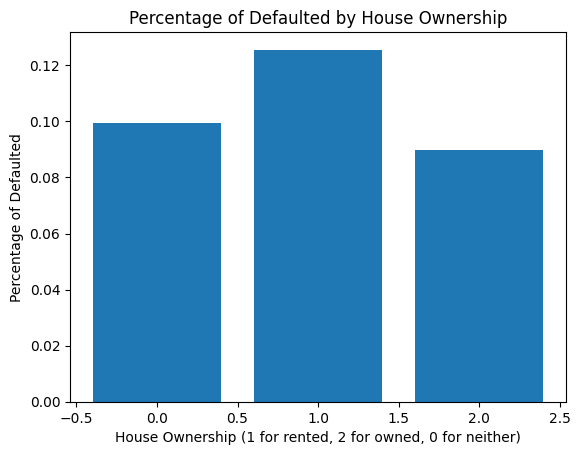

In [192]:
plt.bar(house_counts.index, house_counts['Defaulted_Ratio'])
plt.title('Percentage of Defaulted by House Ownership')
plt.xlabel('House Ownership (1 for rented, 2 for owned, 0 for neither)')
plt.ylabel('Percentage of Defaulted')

In [193]:
# Lastly for Owns_Car and Is_Married
car_counts = df['Owns_Car'].value_counts()
risk_car_counts = df[df['Risk_Flag'] == 1]['Owns_Car'].value_counts()

car_counts = car_counts.to_frame(name='Total')
risk_car_counts = risk_car_counts.to_frame(name='Defaulted')

car_counts = car_counts.merge(risk_car_counts, on='Owns_Car', how='left')
car_counts.fillna(0, inplace=True)

car_counts.sort_index(inplace=True)

# Adding ratio column
car_counts['Defaulted_Ratio'] = car_counts['Defaulted'] / car_counts['Total']

car_counts.head()

,Total,Defaulted,Defaulted_Ratio
Owns_Car,,,
0,176000,22561,0.128188
1,76000,8435,0.110987


In [194]:
married_counts = df['Is_Married'].value_counts()
risk_married_counts = df[df['Risk_Flag'] == 1]['Is_Married'].value_counts()

married_counts = married_counts.to_frame(name='Total')
risk_married_counts = risk_married_counts.to_frame(name='Defaulted')

married_counts = married_counts.merge(risk_married_counts, on='Is_Married', how='left')
married_counts.fillna(0, inplace=True)

married_counts.sort_index(inplace=True)

# Adding ratio column
married_counts['Defaulted_Ratio'] = married_counts['Defaulted'] / married_counts['Total']

married_counts.head()

,Total,Defaulted,Defaulted_Ratio
Is_Married,,,
0,226272,28360,0.125336
1,25728,2636,0.102456


In [195]:
# Let's see if any of these ratios change with different combinations of
# Is_Married, Owns_Car, Risk_Flag
married_car_group = df.groupby(['Is_Married', 'Owns_Car'])['Risk_Flag'].value_counts(normalize=True)
married_car_group

Is_Married  Owns_Car  Risk_Flag
0           0         0            0.869529
                      1            0.130471
            1         0            0.886546
                      1            0.113454
1           0         0            0.891844
                      1            0.108156
            1         0            0.910846
                      1            0.089154
Name: proportion, dtype: float64

We can see that the proportion of defaulters is decreasing as we go down the table. For example, the proportion of defaulters among single individuals without a car is 13.04%. In the next group -- single individuals with a car -- this proportion is 11.34%.

In [196]:
# What if we include Above_Income_Threshold?
larger_group = df.groupby(['Above_Income_Threshold', 'Is_Married', 'Owns_Car'])['Risk_Flag'].value_counts(normalize=True)
larger_group.head()

Above_Income_Threshold  Is_Married  Owns_Car  Risk_Flag
0                       0           0         0            0.803755
                                              1            0.196245
                                    1         0            0.785274
                                              1            0.214726
                        1           0         0            0.813579
Name: proportion, dtype: float64

It appears that those who are above the income threshold are less likely to default than those below it.

In [197]:
# Add group by profession?
even_larger_group = df.groupby(['Above_Income_Threshold', 'Is_Married', 'Owns_Car', 'Profession'])['Risk_Flag'].value_counts(normalize=True)
even_larger_group

Above_Income_Threshold  Is_Married  Owns_Car  Profession              Risk_Flag
0                       0           0         Air_Traffic_Controller  0            0.780645
                                                                      1            0.219355
                                              Analyst                 0            0.806250
                                                                      1            0.193750
                                              Architect               0            0.772414
                                                                                     ...   
1                       1           1         Technician              1            0.011976
                                              Technology_Specialist   0            0.975610
                                                                      1            0.024390
                                              Web_Designer            0            0.960630
                                                                      1            0.039370
Name: proportion, Length: 806, dtype: float64

What happens if we change the threshold for Above_Income_Threshold?

In [198]:
threshold = 0.10

# Group profession, state, and city and get the income at the threshold-th quantile
income_group = df.groupby(['Profession', 'STATE', 'CITY'])['Income'].quantile(threshold)

# Updating above_income_threshold
df['Above_Income_Threshold'] = df.apply(lambda x: 1 if x['Income'] >= income_group[x['Profession'], x['STATE'], x['CITY']] else 0, axis=1)

# Check if the proportion of Risk_Flag for each group changes
even_larger_group = df.groupby(['Above_Income_Threshold', 'Is_Married', 'Owns_Car', 'Profession'])['Risk_Flag'].value_counts(normalize=True)
even_larger_group

Above_Income_Threshold  Is_Married  Owns_Car  Profession              Risk_Flag
0                       0           0         Air_Traffic_Controller  0            0.789157
                                                                      1            0.210843
                                              Analyst                 0            0.807018
                                                                      1            0.192982
                                              Architect               0            0.780000
                                                                                     ...   
1                       1           1         Technician              1            0.012048
                                              Technology_Specialist   0            0.975610
                                                                      1            0.024390
                                              Web_Designer            0            0.960630
                                                                      1            0.039370
Name: proportion, Length: 807, dtype: float64

In [199]:
# Retrieve those who are below the income threshold
even_larger_group.get(0)

Is_Married  Owns_Car  Profession              Risk_Flag
0           0         Air_Traffic_Controller  0            0.789157
                                              1            0.210843
                      Analyst                 0            0.807018
                                              1            0.192982
                      Architect               0            0.780000
                                                             ...   
1           1         Technician              1            0.142857
                      Technology_Specialist   0            0.750000
                                              1            0.250000
                      Web_Designer            0            0.846154
                                              1            0.153846
Name: proportion, Length: 400, dtype: float64

In [200]:
# Retrieve those above the income threshold
even_larger_group.get(1)

Is_Married  Owns_Car  Profession              Risk_Flag
0           0         Air_Traffic_Controller  0            0.863742
                                              1            0.136258
                      Analyst                 0            0.882496
                                              1            0.117504
                      Architect               0            0.865479
                                                             ...   
1           1         Technician              1            0.012048
                      Technology_Specialist   0            0.975610
                                              1            0.024390
                      Web_Designer            0            0.960630
                                              1            0.039370
Name: proportion, Length: 407, dtype: float64

In [201]:
# Let's look more closely at the loan users who are air traffic controllers
air_traffic_group = df[df['Profession'] == 'Air_Traffic_Controller']
air_traffic_group.groupby(['Above_Income_Threshold', 'Is_Married', 'Owns_Car'])['Risk_Flag'].value_counts(normalize=True)

Above_Income_Threshold  Is_Married  Owns_Car  Risk_Flag
0                       0           0         0            0.789157
                                              1            0.210843
                                    1         0            0.763889
                                              1            0.236111
                        1           0         0            0.888889
                                              1            0.111111
                                    1         0            0.888889
                                              1            0.111111
1                       0           0         0            0.863742
                                              1            0.136258
                                    1         0            0.878605
                                              1            0.121395
                        1           0         0            0.825545
                                              1            0.174455
                                    1         0            0.933333
                                              1            0.066667
Name: proportion, dtype: float64

In [202]:
# Now let's see if we can find any differences between those who default and
# those who don't in the group below the income threshold, is single, and w/o a car
air_traffic_df = df[(df['Profession'] == 'Air_Traffic_Controller') & (df['Above_Income_Threshold'] == 0) &
                    (df['Is_Married'] == 0) & (df['Owns_Car'] == 0)]
air_traffic_df

,Income,Age,Experience,Is_Married,House_Ownership_Ordinal,Owns_Car,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold
216032,6298584,29,13,0,1,0,Air_Traffic_Controller,Noida,Uttar_Pradesh,10,10,0,0
216067,5170249,40,20,0,1,0,Air_Traffic_Controller,Tezpur,Assam,14,10,0,0
216467,5288757,77,14,0,1,0,Air_Traffic_Controller,Chandrapur,Maharashtra,14,14,0,0
216756,2466298,72,13,0,1,0,Air_Traffic_Controller,Tenali,Andhra_Pradesh,13,10,0,0
216869,8150696,31,16,0,1,0,Air_Traffic_Controller,Gopalpur,West_Bengal,14,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250795,5226404,53,10,0,1,0,Air_Traffic_Controller,Thane,Maharashtra,10,10,0,0
251014,1276979,79,9,0,1,0,Air_Traffic_Controller,Khammam,Telangana,4,12,0,0
251651,4812868,27,18,0,1,0,Air_Traffic_Controller,Ramgarh,Jharkhand,9,13,0,0
251768,276576,63,5,0,1,0,Air_Traffic_Controller,Shahjahanpur,Uttar_Pradesh,5,12,0,0


In [203]:
air_traffic_df[air_traffic_df['Risk_Flag'] == 1].describe()

,Income,Age,Experience,Is_Married,House_Ownership_Ordinal,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold
count,3.500000e+01,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.0,35.0
mean,3.168660e+06,51.142857,9.628571,0.0,1.057143,0.0,6.600000,11.971429,1.0,0.0
std,2.284411e+06,16.275465,6.145710,0.0,0.235504,0.0,3.828684,1.653618,0.0,0.0
min,3.364900e+04,23.000000,0.000000,0.0,1.000000,0.0,0.000000,10.000000,1.0,0.0
25%,1.275126e+06,38.000000,5.000000,0.0,1.000000,0.0,3.000000,10.000000,1.0,0.0
50%,2.869029e+06,50.000000,10.000000,0.0,1.000000,0.0,7.000000,12.000000,1.0,0.0
75%,4.508179e+06,66.000000,13.000000,0.0,1.000000,0.0,10.000000,14.000000,1.0,0.0
max,8.963228e+06,78.000000,20.000000,0.0,2.000000,0.0,13.000000,14.000000,1.0,0.0


In [204]:
air_traffic_df[air_traffic_df['Risk_Flag'] == 0].describe()

,Income,Age,Experience,Is_Married,House_Ownership_Ordinal,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold
count,1.310000e+02,131.000000,131.000000,131.0,131.00000,131.0,131.000000,131.000000,131.0,131.0
mean,3.265431e+06,50.549618,10.007634,0.0,1.00000,0.0,6.580153,11.977099,0.0,0.0
std,2.406823e+06,17.056564,5.927117,0.0,0.27735,0.0,3.675185,1.422163,0.0,0.0
min,1.433900e+04,21.000000,0.000000,0.0,0.00000,0.0,0.000000,10.000000,0.0,0.0
25%,1.279514e+06,38.000000,5.000000,0.0,1.00000,0.0,4.000000,11.000000,0.0,0.0
50%,2.650606e+06,49.000000,10.000000,0.0,1.00000,0.0,6.000000,12.000000,0.0,0.0
75%,4.984131e+06,66.500000,14.500000,0.0,1.00000,0.0,9.000000,13.000000,0.0,0.0
max,9.260887e+06,79.000000,20.000000,0.0,2.00000,0.0,14.000000,14.000000,0.0,0.0


Before exporting the final dataset, I will try to reduce the number of unique professions by grouping into unique sectors (e.g., government, retail, engineer, etc.)

In [205]:
df['Profession'].unique()

array(['Mechanical_Engineer', 'Software_Developer', 'Technical_Writer',
       'Civil_Servant', 'Librarian', 'Economist', 'Flight_Attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_Traffic_Controller', 'Politician', 'Police_Officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_Engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_Hardware_Engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_Operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_Designer',
       'Consultant', 'Chef', 'Army_Officer', 'Surgeon', 'Scientist',
       'Civil_Engineer', 'Industrial_Engineer', 'Technology_Specialist'],
      dtype=object)

Let's group professions into ten sectors: Engineering & Technology,
Science & Research, Medical & Health, Legal & Judiciary, Public Service & Government,
Creative Arts & Design, Architecture & Construction, Finance & Business,
Aviation & Transportation, and Education & Information.

In [206]:
# Categorizing the professions into sectors
legal_judiciary_profs = ['Lawyer', 'Magistrate']
engineer_tech_profs = ['Mechanical_Engineer', 'Software_Developer', 'Design_Engineer',
                            'Chemical_Engineer', 'Biomedical_Engineer', 'Computer_Hardware_Engineer',
                            'Petroleum_Engineer', 'Civil_Engineer', 'Industrial_Engineer',
                            'Engineer', 'Technology_Specialist', 'Drafter', 'Technician', 'Web_Designer']
science_research_profs = ['Scientist', 'Microbiologist', 'Geologist',
                            'Statistician', 'Economist', 'Psychologist']
medical_health_profs = ['Physician', 'Dentist', 'Surgeon']
public_government_profs = ['Civil_Servant', 'Politician', 'Official', 'Army_Officer',
                           'Police_Officer', 'Firefighter', 'Air_Traffic_Controller']
creative_design_profs = ['Designer', 'Graphic_Designer', 'Artist', 'Fashion_Designer', 'Comedian']
arch_construction_profs = ['Architect', 'Surveyor']
finance_business_profs = ['Financial_Analyst', 'Chartered_Accountant', 'Analyst', 'Chef',
                          'Consultant', 'Secretary', 'Computer_Operator', 'Hotel_Manager']
aviation_transport_profs = ['Aviator', 'Flight_Attendant']
education_info_profs = ['Librarian', 'Technical_Writer']

def prof_sector(profession):
  if profession in legal_judiciary_profs:
    return 'Legal & Judiciary'
  elif profession in engineer_tech_profs:
    return 'Engineering & Technology'
  elif profession in science_research_profs:
    return 'Science & Research'
  elif profession in medical_health_profs:
    return 'Medical & Health'
  elif profession in public_government_profs:
    return 'Public Service & Government'
  elif profession in creative_design_profs:
    return 'Creative Arts & Design'
  elif profession in arch_construction_profs:
    return 'Architecture & Construction'
  elif profession in finance_business_profs:
    return 'Finance & Business'
  elif profession in aviation_transport_profs:
    return 'Aviation & Transportation'
  elif profession in education_info_profs:
    return 'Education & Information'
  else:
    return 'No sector'

In [207]:
# Example of using this function
prof_sector('Analyst')

'Finance & Business'

In [208]:
df['Sector'] = df['Profession'].map(lambda x: prof_sector(x))
df.head()

,Income,Age,Experience,Is_Married,House_Ownership_Ordinal,Owns_Car,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold,Sector
0,1303834,23,3,0,1,0,Mechanical_Engineer,Rewa,Madhya_Pradesh,3,13,0,0,Engineering & Technology
1,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0,1,Engineering & Technology
2,3991815,66,4,1,1,0,Technical_Writer,Alappuzha,Kerala,4,10,0,1,Education & Information
3,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,Engineering & Technology
4,5768871,47,11,0,1,0,Civil_Servant,Tiruchirappalli,Tamil_Nadu,3,14,1,1,Public Service & Government


In [210]:
# Check if the column was created correctly
df['Sector'].value_counts()

,count
Sector,
Engineering & Technology,70015
Finance & Business,39000
Public Service & Government,32928
Science & Research,30103
Creative Arts & Design,25188
Medical & Health,15511
Legal & Judiciary,10175
Aviation & Transportation,9886
Education & Information,9823


In [211]:
# One hot-encoding for Sector, and STATE
df = pd.get_dummies(df, columns=['Sector', 'STATE'], dtype=int)

In [212]:
'''
Now to drop the columns that won't be in the exported dataset.
I will remove Profession since it was used to create Sector and its
dummy variables. I will lastly remove CITY because I believe there it has too many
unique values to work with -- though this may change in the future, depending on the
performance of my model.
'''
df.drop(columns = ['Profession', 'CITY'], inplace=True)

### **3) Export Final Cleaned Dataset**

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 48 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Income                              252000 non-null  int64
 1   Age                                 252000 non-null  int64
 2   Experience                          252000 non-null  int64
 3   Is_Married                          252000 non-null  int64
 4   House_Ownership_Ordinal             252000 non-null  int64
 5   Owns_Car                            252000 non-null  int64
 6   CURRENT_JOB_YRS                     252000 non-null  int64
 7   CURRENT_HOUSE_YRS                   252000 non-null  int64
 8   Risk_Flag                           252000 non-null  int64
 9   Above_Income_Threshold              252000 non-null  int64
 10  Sector_Architecture & Construction  252000 non-null  int64
 11  Sector_Aviation & Transportation    252000 non-null 

In [214]:
# Export cleaned dataset
df.to_csv('loan_users_cleaned.csv', index=False, header=True)